# Introduction
As part of my first project I decided to analyze the Boston Air BnB data. AirBnB is becoming more and more popular way for people to travel and visit new places as well as simply staying the night in their favorite city. While booking apartments through AirBnB is arguably already the cheapest/best way for people to spend the night, it would still be useful to see how prices differ throughout the year and whether we can use existing data to predict average price in the future. Such information could help people plan their next holidays better and save some extra money for other activities.

# Goals for This Project
I will answer the following questions: <br>
1. Are there any seasonality effects/do prices tend to be higher during certain times of the year?
2. Are there any significat differences between AirBnB prices between the two cities or are they similar?
3. Can we use the "% of available apartments" to predict the average price for an AirBnB booking?

## Load the data

In [80]:
# first import the packes we will need
# pandas to read the data, clean it and prepare it
# numpy in case we will have to work with numarical arrays
# matplotlib for plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
# read the calendar data from my github repository for this project into dfs
df_calendar_boston = pd.read_csv('https://github.com/acp91/DataScience_Project1/blob/master/calendar_boston.csv?raw=true')
df_calendar_seattle = pd.read_csv('https://github.com/acp91/DataScience_Project1/blob/master/calendar_seattle.csv?raw=true')
#df_listings_boston = pd.read_csv('https://github.com/acp91/DataScience_Project1/blob/master/listings_boston.csv?raw=true')
#df_listings_seattle = pd.read_csv('https://github.com/acp91/DataScience_Project1/blob/master/listings_seattle.csv?raw=true')
#df_reviews_boston = pd.read_csv('https://github.com/acp91/DataScience_Project1/blob/master/reviews_boston.csv?raw=true')
#df_reviews_seattle = pd.read_csv('https://github.com/acp91/DataScience_Project1/blob/master/reviews_seattle.csv?raw=true')

Let's first check df_celndar data sets to see how the data looks like

In [82]:
df_calendar_boston.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


Next let's check if there are any duplicates and drop them if needed

In [83]:
print('Boston has {} number of duplicates and Seattle has {} number of duplicates.'.format(df_calendar_boston.duplicated().sum(), df_calendar_seattle.duplicated().sum()))

Boston has 365 number of duplicates and Seattle has 0 number of duplicates.


In [84]:
# let's drop duplicates from the Boston dataset
df_calendar_boston.drop_duplicates(inplace=True)
df_calendar_boston.duplicated().sum()

0

In [85]:
# let's create a dummy variable for the city and availability and join data sets
df_calendar_boston_dummy = df_calendar_boston.join(pd.get_dummies(df_calendar_boston['available'], drop_first=True))
df_calendar_seattle_dummy = df_calendar_seattle.join(pd.get_dummies(df_calendar_seattle['available'], drop_first=True))
df_calendar_boston_dummy['boston?']=1
df_calendar_seattle_dummy['boston?']=0
df_calendar_dummy = df_calendar_boston_dummy.append(df_calendar_seattle_dummy)
df_calendar_dummy

,listing_id,date,available,price,t,boston?
0,12147973,2017-09-05,f,NaN,0,1
1,12147973,2017-09-04,f,NaN,0,1
2,12147973,2017-09-03,f,NaN,0,1
3,12147973,2017-09-02,f,NaN,0,1
4,12147973,2017-09-01,f,NaN,0,1
...,...,...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN,0,0
1393566,10208623,2016-12-30,f,NaN,0,0
1393567,10208623,2016-12-31,f,NaN,0,0
1393568,10208623,2017-01-01,f,NaN,0,0


## Availability by date

In [86]:
# create a function that creates year and month string - we will use this for groupping and plotting
def create_year_month(x):
    # input should be a string of format yyyy-mm-dd
    # function returns year and month date in format yyyy-mm to be used to for easier grouping and analysis
    return x[:7]

In [87]:
# create a new columns year_month that shows year month (yyyy-mm)
df_calendar_dummy['year_month'] = df_calendar_dummy['date'].apply(create_year_month)

In [88]:
df_calendar_dummy

,listing_id,date,available,price,t,boston?,year_month
0,12147973,2017-09-05,f,NaN,0,1,2017-09
1,12147973,2017-09-04,f,NaN,0,1,2017-09
2,12147973,2017-09-03,f,NaN,0,1,2017-09
3,12147973,2017-09-02,f,NaN,0,1,2017-09
4,12147973,2017-09-01,f,NaN,0,1,2017-09
...,...,...,...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN,0,0,2016-12
1393566,10208623,2016-12-30,f,NaN,0,0,2016-12
1393567,10208623,2016-12-31,f,NaN,0,0,2016-12
1393568,10208623,2017-01-01,f,NaN,0,0,2017-01


In [89]:
# check if there are any missing prices for available dates
df_calendar_dummy['t'].isnull().sum()

0

Good, there are no missing values. We can plot the histogram and to see if there are any seasonality effects that we can see

## Checking for patterns / seasonality

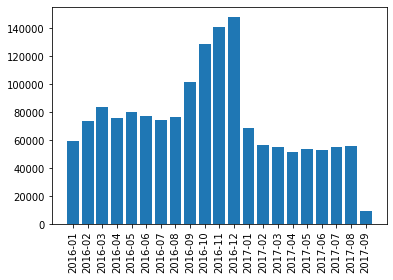

In [90]:
# let's plot a histogram showing a number of bookings over time (per month)
number_of_bookings = df_calendar_dummy[df_calendar_dummy['available']=='t'][['year_month', 'available']].groupby('year_month').count()['available']
dates_price = df_calendar_dummy[df_calendar_dummy['available']=='t'][['year_month', 'available']].groupby('year_month').count().index
plt.bar(dates_price, number_of_bookings)
plt.xticks(rotation=90)
plt.show()

Graph shows there are significantly more bookings during the months of October, November and December. Let's check how histogram looks for the two cities separately to analyze this further.

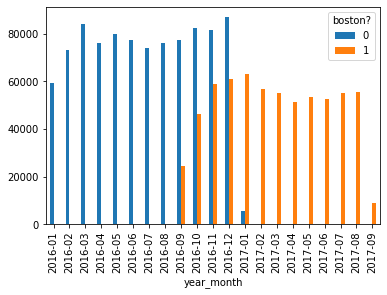

In [91]:
df_calendar_dummy.groupby(['year_month', 'boston?'])['t'].sum().unstack().plot.bar()

In [92]:
df_calendar_dummy[(df_calendar_dummy['boston?']==1) & (df_calendar_dummy['year_month']=='2017-09')]['date'].unique()

array(['2017-09-05', '2017-09-04', '2017-09-03', '2017-09-02',
       '2017-09-01'], dtype=object)

It turns out combined histogram was missleading: there are only 5 days for September 2017 and the dates that showed the most available apartments were the days that overlapped bet. <br><br>
To see which of the cities is most popular (i.e. has less available apartments), let's rather take a look at the % of available apartments for each of the months.

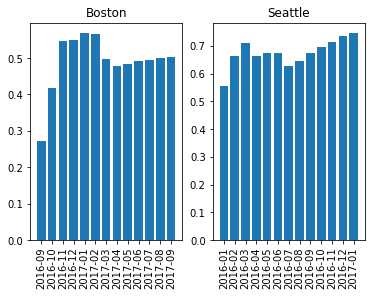

In [93]:
# plot occupancy rate for both cities
occupied_boston = df_calendar_dummy[(df_calendar_dummy['available']=='t') & (df_calendar_dummy['boston?']==1)][['year_month', 't']].groupby('year_month').sum()['t'] / df_calendar_dummy[df_calendar_dummy['boston?']==1].groupby('year_month').count()['boston?']
dates_boston = df_calendar_dummy[(df_calendar_dummy['available']=='t') & (df_calendar_dummy['boston?']==1)][['year_month', 't']].groupby('year_month').sum().index
plt.subplot(1,2,1)
plt.title('Boston')
plt.bar(dates_boston, occupied_boston)
plt.xticks(rotation=90)
occupied_seattle = df_calendar_dummy[(df_calendar_dummy['available']=='t') & (df_calendar_dummy['boston?']==0)][['year_month', 't']].groupby('year_month').sum()['t'] / df_calendar_dummy[df_calendar_dummy['boston?']==0].groupby('year_month').count()['boston?']
dates_seattle = df_calendar_dummy[(df_calendar_dummy['available']=='t') & (df_calendar_dummy['boston?']==0)][['year_month', 't']].groupby('year_month').sum().index
plt.subplot(1,2,2)
plt.title('Seattle')
plt.bar(dates_seattle, occupied_seattle)
plt.xticks(rotation=90)
plt.show()

Boston looks to be more popular city for AirBnB visitors as there are on average ~50% apartments available whereas in Seattle there are ~70%.

## Average price

In [94]:
# let's check datatypes to see why that is
df_calendar_dummy.dtypes

listing_id     int64
date          object
available     object
price         object
t              uint8
boston?        int64
year_month    object
dtype: object

In [95]:
# price is an object because it has a dollar sign assigned
df_calendar_dummy[df_calendar_dummy['available']=='t']['price']

365        $65.00
366        $65.00
367        $65.00
368        $75.00
369        $75.00
            ...  
1393207    $87.00
1393208    $87.00
1393211    $87.00
1393212    $87.00
1393213    $87.00
Name: price, Length: 1577499, dtype: object

Let's write a function that removes dollar sign (if value is a string). Here I helped myself with an existing blog post [here](https://pbpython.com/currency-cleanup.html)

In [96]:
def remove_currency_sign(x):
    # input to the function can be any variable
    # if the input is a string then the function removes the $ and , signs and returns the new value. Otherwise output = input
    # it will be used to create numeric values  from strngs so that we can perform analysis
    if isinstance(x, str):
        return x.replace('$','').replace(',','')

In [97]:
# let's apply this function to the price column and convert it to float
df_calendar_dummy['price'] = df_calendar_dummy['price'].apply(remove_currency_sign).astype('float')

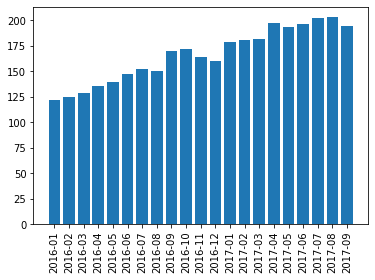

In [98]:
# bar chart for the average price
average_price = df_calendar_dummy[df_calendar_dummy['available']=='t'][['year_month', 'price']].groupby('year_month').mean()['price']
dates_price = df_calendar_dummy[df_calendar_dummy['available']=='t'][['year_month', 'price']].groupby('year_month').mean().index
plt.bar(dates_price, average_price)
plt.xticks(rotation=90)
plt.show()

Similar to above let's check side by side if the average price differs between the two cities

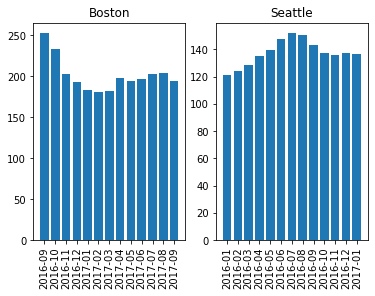

In [99]:
# plot average prices for both cities
occupied_boston = df_calendar_dummy[(df_calendar_dummy['available']=='t') & (df_calendar_dummy['boston?']==1)][['year_month', 'price']].groupby('year_month').mean()['price']
dates_boston = df_calendar_dummy[(df_calendar_dummy['available']=='t') & (df_calendar_dummy['boston?']==1)][['year_month', 'price']].groupby('year_month').mean().index
plt.subplot(1,2,1)
plt.title('Boston')
plt.bar(dates_boston, occupied_boston)
plt.xticks(rotation=90)
occupied_seattle = df_calendar_dummy[(df_calendar_dummy['available']=='t') & (df_calendar_dummy['boston?']==0)][['year_month', 'price']].groupby('year_month').mean()['price']
dates_seattle = df_calendar_dummy[(df_calendar_dummy['available']=='t') & (df_calendar_dummy['boston?']==0)][['year_month', 'price']].groupby('year_month').mean().index
plt.subplot(1,2,2)
plt.title('Seattle')
plt.bar(dates_seattle, occupied_seattle)
plt.xticks(rotation=90)
plt.show()

On average price for an AirBnB booking in Bostong is significantly higher than in Seattle (roughly 40%). There are likely various factors affecting it, one of them most probably being that Boston is more well known abroad and as such more popular tourist destnation.

## Number of bookings and price trends

Overall trends for Boston

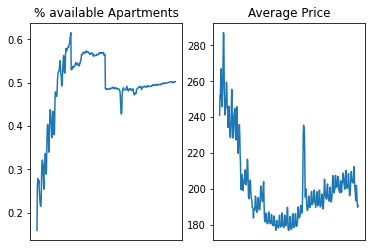

In [100]:
df_calendar_trend_booking = df_calendar_dummy[(df_calendar_dummy['available']=='t') & (df_calendar_dummy['boston?']==1)].groupby('date').count()['t'] / df_calendar_dummy[df_calendar_dummy['boston?']==1].groupby('date').count()['t']
dates_booking = df_calendar_trend_booking.index
booking = df_calendar_trend_booking
plt.subplot(1,2,1)
plt.title('% available Apartments')
plt.plot(dates_booking, booking)
plt.gca().axes.xaxis.set_visible(False)
df_calendar_trend_price = df_calendar_dummy[(df_calendar_dummy['available']=='t') & (df_calendar_dummy['boston?']==1)].groupby('date').mean()
dates_price = df_calendar_trend_price.index
prices = df_calendar_trend_price['price']
plt.subplot(1,2,2)
plt.title('Average Price')
plt.plot(dates_price, prices)
plt.gca().axes.xaxis.set_visible(False)
plt.show()

Overall trends for Seattle

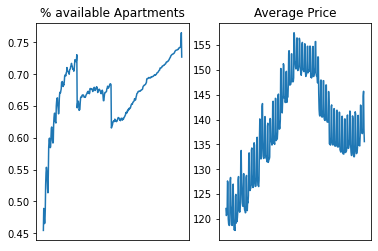

In [101]:
df_calendar_trend_booking = df_calendar_dummy[(df_calendar_dummy['available']=='t') & (df_calendar_dummy['boston?']==0)].groupby('date').count()['t'] / df_calendar_dummy[df_calendar_dummy['boston?']==0].groupby('date').count()['t']
dates_booking = df_calendar_trend_booking.index
booking = df_calendar_trend_booking
plt.subplot(1,2,1)
plt.title('% available Apartments')
plt.plot(dates_booking, booking)
plt.gca().axes.xaxis.set_visible(False)
df_calendar_trend_price = df_calendar_dummy[(df_calendar_dummy['available']=='t') & (df_calendar_dummy['boston?']==0)].groupby('date').mean()
dates_price = df_calendar_trend_price.index
prices = df_calendar_trend_price['price']
plt.subplot(1,2,2)
plt.title('Average Price')
plt.plot(dates_price, prices)
plt.gca().axes.xaxis.set_visible(False)
plt.show()

Combined trends

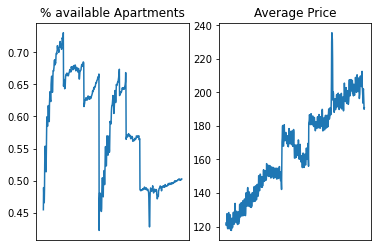

In [102]:
df_calendar_trend_booking = df_calendar_dummy[(df_calendar_dummy['available']=='t')].groupby('date').count()['t'] / df_calendar_dummy.groupby('date').count()['t']
dates_booking = df_calendar_trend_booking.index
booking = df_calendar_trend_booking
plt.subplot(1,2,1)
plt.title('% available Apartments')
plt.plot(dates_booking, booking)
plt.gca().axes.xaxis.set_visible(False)
df_calendar_trend_price = df_calendar_dummy[(df_calendar_dummy['available']=='t')].groupby('date').mean()
dates_price = df_calendar_trend_price.index
prices = df_calendar_trend_price['price']
plt.subplot(1,2,2)
plt.title('Average Price')
plt.plot(dates_price, prices)
plt.gca().axes.xaxis.set_visible(False)
plt.show()

Boston data is more in line what we'd expect, meaning higher occupancy rate/demand means higher prices. However overall the trend for both cities is still there. <br><br>
Therefore we can go now  a step further and create a simple linear regression model where we try to predict the average price for a booking given the occupancy rate and which city the apartment is located in. <br><br>

## Regression 

In [103]:
# import necessary packages for the linear regression and interpretation of the results
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.stattools import adfuller

Let's create a new dataset that will store the average price for a given day.

In [104]:
# create a new dataset that stores the average price by date
df_calendar_regression = df_calendar_dummy[df_calendar_dummy['t']==1][['date', 'price']].groupby(['date']).mean()
df_calendar_regression = df_calendar_regression.rename(columns={"price":"average_price"})
df_calendar_regression

,average_price
date,
2016-01-04,122.085879
2016-01-05,120.681307
2016-01-06,120.928258
2016-01-07,120.958896
2016-01-08,127.640853
...,...
2017-09-01,202.046797
2017-09-02,197.997775
2017-09-03,192.566038


In [105]:
# add a column that stores the occupancy rate by date
df_calendar_regression = df_calendar_regression.join( 1 - df_calendar_dummy[df_calendar_dummy['t']==1][['date', 't']].groupby(['date']).sum()['t'] / df_calendar_dummy[['date', 't']].groupby(['date']).count()['t'])
df_calendar_regression = df_calendar_regression.rename(columns={"t":"occupancy_rate"})
df_calendar_regression = df_calendar_regression.reset_index()

In [106]:
# check to see hwo the new dataframe looks like
df_calendar_regression

,date,average_price,occupancy_rate
0,2016-01-04,122.085879,0.545574
1,2016-01-05,120.681307,0.511001
2,2016-01-06,120.928258,0.521739
3,2016-01-07,120.958896,0.534835
4,2016-01-08,127.640853,0.533263
...,...,...,...
606,2017-09-01,202.046797,0.499303
607,2017-09-02,197.997775,0.498466
608,2017-09-03,192.566038,0.497350
609,2017-09-04,189.907829,0.497629


Looks good! Let's use 'occupancy_rate' to see if we can predict average price for a CoB 

In [107]:
# prepare data for the linear regression by create matrix for independent variables X and a vector y for dependent variable
X = df_calendar_regression[['occupancy_rate']]
y = df_calendar_regression[['average_price']]
# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

# run a linear regression model
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

In [108]:
"The r-squared score for the model was {:.2f} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model was 0.60 on 184 values.'

Text(0, 0.5, 'Average Price')

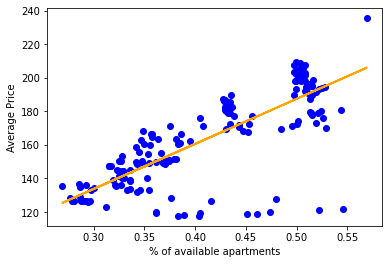

In [109]:
# plotting regression line
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_test_preds, color='orange', linewidth=2)
plt.xlabel('% of available apartments')
plt.ylabel('Average Price')

Next let's check if adding a dummy variable 'boston?' helps with the prediciton. Given that Seattle exhibits a bit of a different trend compared to Boston, my expectation is that this should improve the prediciton.

In [110]:
# create a new dataset that stores the average price by date
df_calendar_regression = df_calendar_dummy[df_calendar_dummy['t']==1][['date', 'price', 'boston?']].groupby(['date', 'boston?']).mean()
df_calendar_regression = df_calendar_regression.rename(columns={"price":"average_price"})
df_calendar_regression

,,average_price
date,boston?,
2016-01-04,0,122.085879
2016-01-05,0,120.681307
2016-01-06,0,120.928258
2016-01-07,0,120.958896
2016-01-08,0,127.640853
...,...,...
2017-09-01,1,202.046797
2017-09-02,1,197.997775
2017-09-03,1,192.566038


In [111]:
# add a column that stores the occupancy rate by date
df_calendar_regression = df_calendar_regression.join( 1 - df_calendar_dummy[df_calendar_dummy['t']==1][['date', 't', 'boston?']].groupby(['date', 'boston?']).sum()['t'] / df_calendar_dummy[['date', 't', 'boston?']].groupby(['date', 'boston?']).count()['t'])
df_calendar_regression = df_calendar_regression.rename(columns={"t":"occupancy_rate"})
df_calendar_regression = df_calendar_regression.reset_index()

In [112]:
# check to see hwo the new dataframe looks like
df_calendar_regression

,date,boston?,average_price,occupancy_rate
0,2016-01-04,0,122.085879,0.545574
1,2016-01-05,0,120.681307,0.511001
2,2016-01-06,0,120.928258,0.521739
3,2016-01-07,0,120.958896,0.534835
4,2016-01-08,0,127.640853,0.533263
...,...,...,...,...
725,2017-09-01,1,202.046797,0.499303
726,2017-09-02,1,197.997775,0.498466
727,2017-09-03,1,192.566038,0.497350
728,2017-09-04,1,189.907829,0.497629


In [113]:
# prepare data for the linear regression by create matrix for independent variables X and a vector y for dependent variable
X = df_calendar_regression[['occupancy_rate', 'boston?']]
y = df_calendar_regression[['average_price']]
# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

# run a linear regression model
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

In [114]:
"The r-squared score for the model was {:.2f} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model was 0.89 on 219 values.'

Indeed, as expected, the r2 has improved by 9% when adding 'boston?' variable to our regression.
<br><br>
However one thing we noticed before during plotting of trend for average price is that it exibits a strong trend. To solve the problem of non-stationairty I helped myself with the blog that can be found [here](https://machinelearningmastery.com/time-series-data-stationary-python/).
<br><br>
Let's check for stationairty of time series:

In [115]:
# run DF test on y = average_price
result = adfuller(df_calendar_regression[['average_price']])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.860216
p-value: 0.351002
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


P-value is 0.35 and therefore we cannot reject the null hypothesis - we are dealing with non-stationary time series. <br><br>
One way to fix this is to take the differences in prices instead

In [116]:
df_regression_detrend = df_calendar_regression.drop(columns=['date', 'boston?', 'occupancy_rate'])
df_regression_detrend = df_regression_detrend.diff().loc[1:]
# add the other columns back
df_regression_detrend = df_regression_detrend.join(df_calendar_regression[['boston?', 'occupancy_rate']])
df_regression_detrend 

,average_price,boston?,occupancy_rate
1,-1.404572,0,0.511001
2,0.246952,0,0.521739
3,0.030638,0,0.534835
4,6.681957,0,0.533263
5,-0.310034,0,0.513882
...,...,...,...
725,1.503113,1,0.499303
726,-4.049021,1,0.498466
727,-5.431738,1,0.497350
728,-2.658209,1,0.497629


In [117]:
# prepare data for the linear regression by create matrix for independent variables X and a vector y for dependent variable
X_2 = df_regression_detrend[['occupancy_rate', 'boston?']]
y_2 = df_regression_detrend[['average_price']]
# split the data into train and test set
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = .30, random_state=42) 

# run a linear regression model
lm_model_2 = LinearRegression(normalize=True) # Instantiate
lm_model_2.fit(X_train_2, y_train_2) #Fit
        
#Predict and score the model
y_test_preds_2 = lm_model_2.predict(X_test_2) 

In [118]:
"The r-squared score for the model after de-tredning the time series was {:.2f} on {} values.".format(r2_score(y_test_2, y_test_preds_2), len(y_test_2))

'The r-squared score for the model after de-tredning the time series was 0.53 on 219 values.'

# Results Summary

In this notebook I've analyzed the prices of AirBnB apartments for Boston and Seattle. To remind everyone of what I was interested in, these were my initial questions:
1. Are there any seasonality effects/do prices tend to be higher during certain times of the year?
2. Are there any significat differences between AirBnB prices between the two cities or are they similar?
3. Can we use the "% of available apartments" to predict the average price for an AirBnB booking?

Below are the main outcomes:
1. There is seasonality effect for both cities. Namely the most expensive/most popular month to visit both cities is September and the cheapest/least popular are January and February
* There are a few differences between the two cities:
    * Boston has considerably higher average price throughout the year (by roughly 40%)
    * The number of bookings in Boston is much higher than in Seattle. This can likely be explained by the fact that Boston is a more popular destination among tourists
    * Higher demand/less available departments should result in a higher price. This can be clearly seen for Bostong while for Seattle this is less strongly pronounced
* We can use available data to predict an average price for an apartment:
    * "% of available apartments" has a strong predictive power and can be used in the model (r2 of 60%)
    * Given there are some differences between the two cities it is worh adding a dummy variable that distinguishes whether a certain booking belongs to Boston or Seattle. This extra variable helps to improve the predictive power of the model (r2 of 89%)
    * AirBnB data exhibits a strong trend and Dickey Fuller tests shows that we are dealing with non-stationary time series. This results in spurious regression and incorrect interpretation of results. After accounting for non-stationarity by de-trending the time series (and thus creating a stationary time series), r2 drops to 53%. This is much lower than initially thought but still clearly shows that we can use data to help predict future price for an AirBnB booking

One could further improve the model by:
* extending the dataset. Here I was working with roughly 1y of data only
* add additional explanatory variables. All the information that makes one apartment more attractive from another, such as "distance to a city center", "distance to a public transport", "years since last renovation" etc should help further predict the price